In [2]:

import pandas as pd

In [4]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('datos/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Tipos de objetos primarios:

- ** DataFrame: ** filas y columnas (como una hoja de cálculo)
- ** Serie: ** una sola columna

In [5]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

¿Cuáles son las características?
- ** TV: ** dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
- ** Radio: ** dólares de publicidad gastados en Radio
- ** Periódico: ** dólares publicitarios gastados en el periódico

Cual es la respuesta?
- ** Ventas: ** ventas de un solo producto en un mercado determinado (en miles de artículos)

¿Qué más sabemos?
- Debido a que la variable de respuesta es continua, este es un problema de ** regresión **.
- Hay 200 ** observaciones ** (representadas por las filas), y cada observación es un mercado único.

In [7]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\yoda\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


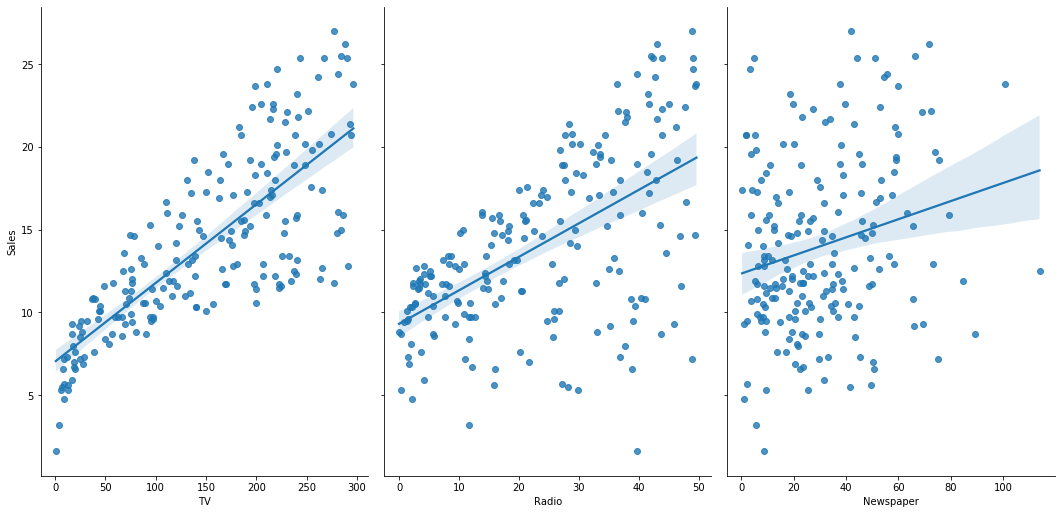

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Regresión lineal

** Ventajas: ** rápido, no se requiere ajuste, altamente interpretable, bien entendido

** Contras: ** es poco probable que produzca la mejor precisión predictiva (supone una relación lineal entre las características y la respuesta)

### Regresión lineal

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

- $ y $ es la respuesta
- $ \ beta_0 $ es la intersección
- $ \ beta_1 $ es el coeficiente de $ x_1 $ (la primera característica)
- $ \ beta_n $ es el coeficiente de $ x_n $ (la enésima característica)


Los valores $ \ beta $ se denominan ** coeficientes del modelo **. Estos valores se "aprenden" durante el paso de ajuste del modelo utilizando el criterio de "mínimos cuadrados". Entonces, ¡el modelo ajustado se puede usar para hacer predicciones!

In [14]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [15]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [16]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [17]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [20]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting model coefficients

In [21]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [22]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

$$ y = 2.88 + 0.0466 \ times TV + 0.179 \ times Radio + 0.00345 \ times Periódico $$

¿Cómo interpretamos el ** coeficiente TV ** (0.0466)?

- Para una cantidad determinada de gasto publicitario en radio y periódicos, ** un aumento de "unidad" en el gasto publicitario de televisión ** se asocia con un aumento de ** 0,0466 "unidad" en las ventas **.
- O más claramente: para una cantidad determinada de gasto publicitario en radio y periódicos, ** $ 1,000 adicionales gastados en anuncios de televisión ** se asocia con un ** aumento en las ventas de 46.6 artículos **.

Notas importantes:

- Esta es una declaración de ** asociación **, no ** causalidad **.
- Si un aumento en la inversión publicitaria de televisión se asoció con una ** disminución ** en las ventas, $ \ beta_1 $ sería ** negativo **.

### Predicciones

In [23]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

**  Mean Squared Error ** MSE) es  la media de los errores al cuadrado:
${\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

In [24]:
# calculate RMSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2)/4.)


150.0
